In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
x=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

In [5]:
x[:,0]

array([1. , 1.5, 5. , 8. , 1. , 9. ])

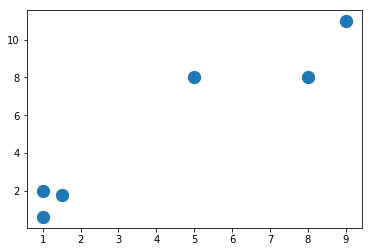

In [7]:
plt.scatter(x[:,0],x[:,1],s=150)

In [8]:
plt.show()

In [9]:
clf=KMeans(n_clusters=2)
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
centroids= clf.cluster_centers_
print(centroids)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]


In [13]:
labels=clf.labels_
print(labels)

[0 0 1 1 0 1]


In [14]:
colors=10*['g.','r.','c.','b.','k.']


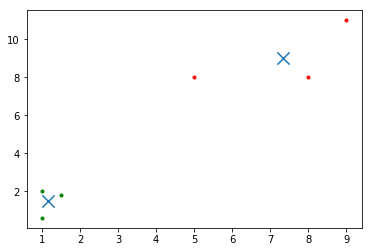

In [37]:
for i in range(len(x)):
    plt.plot(x[i][0],x[i][1],colors[labels[i]])
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150)

In [38]:
plt.show()

In [40]:
df=pd.read_excel(r'D:\csvfile\titanic3.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [41]:
df.drop(['name','body'],axis=1,inplace=True)


In [42]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [43]:
df.shape

(1309, 12)

In [44]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
df['sex']=obj.fit_transform(df.sex)

In [53]:
type(df.columns.values)

numpy.ndarray

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
sex          1309 non-null int64
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
home.dest    745 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [63]:
df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
sex          1309 non-null int64
age          1309 non-null int64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        1309 non-null object
embarked     1309 non-null object
boat         1309 non-null object
home.dest    1309 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 122.8+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [51]:
df.fillna(0,inplace=True)

In [58]:
df.columns

AttributeError: 'Index' object has no attribute 'dtypes'

In [67]:
from sklearn.preprocessing import LabelEncoder
obj =LabelEncoder()
def to_int(dt):
    #dt.drop(['name','body'],axis=1,inplace=True)
    df.convert_objects(convert_numeric=True)
    obj =LabelEncoder()
    columns=dt.columns.values
    #print(columns)
    for column in columns:
        if dt[column].dtype !=np.int64 or dt[column].dtype !=np.float64:
            dt[column]=obj.fit_transform(dt[column])
      
    return(dt) 
dt=to_int(df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


TypeError: '<' not supported between instances of 'str' and 'int'

**convert string to int**

In [70]:
def handle_non_numerical_data(df):
    columns=df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype !=np.int64 and df[column].dtype !=np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
    
            df[column] = list(map(convert_to_int,df[column]))
     
    return df

df = handle_non_numerical_data(df)

In [71]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,0,1,0,45,0,0,740,211.3375,5,3,1,228
1,0,1,1,7,1,2,508,151.5500,73,3,17,7
2,0,0,0,9,1,2,508,151.5500,73,3,0,7
3,0,0,1,46,1,2,508,151.5500,73,3,0,7
4,0,0,0,39,1,2,508,151.5500,73,3,0,7


In [72]:
from sklearn import preprocessing
x=np.array(df.drop(['survived'],1).astype(float))
x=preprocessing.scale(x)
y= np.array(df['survived'])

In [73]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:

x 

array([[-1.54609786, -1.34499549,  0.34800665, ...,  0.62364835,
        -0.52982639,  1.08234233],
       [-1.54609786,  0.74349692, -1.15321154, ...,  0.62364835,
         1.22959709, -0.80206727],
       [-1.54609786, -1.34499549, -1.07420006, ...,  0.62364835,
        -0.63979036, -0.80206727],
       ...,
       [ 0.84191642,  0.74349692,  0.18998369, ..., -1.81687688,
        -0.63979036, -0.86175445],
       [ 0.84191642,  0.74349692,  0.22948943, ..., -1.81687688,
        -0.63979036, -0.86175445],
       [ 0.84191642,  0.74349692,  0.34800665, ...,  0.62364835,
        -0.63979036, -0.86175445]])

In [75]:
x[3]

array([-1.54609786,  0.74349692,  0.3875124 ,  0.54117574,  1.93105635,
        0.13334735,  2.28660634,  1.12537844,  0.62364835, -0.63979036,
       -0.80206727])

In [76]:
y_pred = clf.predict(x)

In [77]:
len(y_pred),len(y)

(1309, 1309)

In [78]:
ct=0
for i in range(len(y)):
    if y[i] ==y_pred[i]:
        ct+=1

ct/len(y)

0.6997708174178763

In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,df.survived))
print((916/1309))
clf.cluster_centers_

[[711 295]
 [ 98 205]]
0.6997708174178763


array([[ 0.44312278,  0.08954552, -0.20542716,  0.00520948, -0.01217521,
         0.04460595, -0.33405764, -0.39644137,  0.16877908, -0.13883125,
        -0.15617093],
       [-1.47122613, -0.29730293,  0.6820453 , -0.01729615,  0.04042329,
        -0.14809765,  1.10911548,  1.3162377 , -0.56036884,  0.46093807,
         0.51850811]])

In [118]:
clf.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [119]:
 df.drop(['ticket'],1,inplace=True)

'''
from sklearn import preprocessing
x=np.array(df.drop(['survived'],1).astype(float))
x=preprocessing.scale(x)
y= np.array(df['survived'])

from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(x)

y_pred = clf.predict(x)


ct=0
for i in range(len(y)):
    if y[i] ==y_pred[i]:
        ct+=1

ct/len(y)
'''

In [124]:
from sklearn import preprocessing
x=np.array(df.drop(['survived','sex'],1).astype(float))
x=preprocessing.scale(x)
y= np.array(df['survived'])

from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(x)

y_pred = clf.predict(x)


ct=0
for i in range(len(y)):
    if y[i] ==y_pred[i]:
        ct+=1

ct/len(y)

0.7058823529411765

## Soft K-Means

In [4]:
import numpy as np
import matplotlib.pyplot as plt

D=2
s=4
mu1=np.array([0,0])
mu2=np.array([s,s])
mu3=np.array([0,s])

N=900
X=np.zeros([N,D])
X


In [18]:
X[:300,:]=np.random.rand(300,D)+mu1

In [29]:
x=np.array([[1,2],[3,4],[5,6]])+mu2

In [32]:
np.random.choice()

AttributeError: module 'numpy' has no attribute 'xrange'

In [2]:
for i in xrange(4):
    print(i)

NameError: name 'xrange' is not defined